In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading Power Data and Cleanup


In [ ]:
power_df = pd.read_csv("electricity_data.csv")
power_df = power_df.iloc[1:]
power_df

,Date,Time,Generation(MW),Demand(MW),Loadshed,Gas,Liquid Fuel,Coal,Hydro,Solar,Wind,India,India.1,India.2,Nepal,Remarks
1,02-01-2024,08:00:00,8143,8143,0,3727,219,3199,86,38,6.0,776,92,NaN,NaN,NaN
2,02-01-2024,07:00:00,7323,7323,0,3738,20,2823,86,2,10.0,582,80,NaN,NaN,NaN
3,02-01-2024,06:00:00,6900,6900,0,3610,0,2534,86,0,7.0,583,80,NaN,NaN,NaN
4,02-01-2024,05:00:00,6514,6514,0,3299,0,2458,86,0,10.0,583,78,NaN,NaN,NaN
5,02-01-2024,04:00:00,6550,6550,0,3337,0,2460,86,0,8.0,583,76,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9176,31-12-2022,08:00:00,7030,7030,0,4824,685,798,46,29,NaN,575,84,NaN,NaN,NaN
9177,31-12-2022,07:00:00,6365,6365,0,4486,419,767,46,3,NaN,575,80,NaN,NaN,NaN
9178,31-12-2022,06:00:00,5923,5923,0,4273,203,768,46,0,NaN,575,68,NaN,NaN,NaN
9179,31-12-2022,05:00:00,5746,5746,0,4090,203,768,46,0,NaN,575,74,NaN,NaN,NaN


In [ ]:
power_df.rename(
    columns={
        "Generation(MW)": "Generation",
        "Demand(MW)": "Demand",
    },
    inplace=True,
)

In [ ]:
power_df["Loadshed"] = power_df["Loadshed"].astype(int)
power_df["Generation"] = power_df["Generation"].astype(int)
power_df["Demand"] = power_df["Demand"].astype(int)

**Clean Up**


In [ ]:
# Invalid Dates
power_df.loc[(power_df["Date"] == "09-02-0021"), "Date"] = "30-12-2023"
power_df.loc[(power_df["Date"] == "11-03-0080"), "Date"] = "01-11-2023"
power_df.loc[(power_df["Date"] == "05-08-0008"), "Date"] = "05-10-2023"
power_df.loc[(power_df["Date"] == "13-06-0050"), "Date"] = "31-07-2023"

# Change 24:00 to 00:00
power_df.loc[(power_df["Time"] == "24:00:00"), "Time"] = "00:00:00"

# Change incorrect formats (KW to MW) and values
power_df.loc[(power_df["Generation"] == 64526500), "Generation"] = 6452
power_df.loc[(power_df["Demand"] == 117000), "Demand"] = 11700
power_df.loc[(power_df["Demand"] == 156050), "Demand"] = 15605
power_df.loc[(power_df["Demand"] == 104860), "Demand"] = 10486
power_df.loc[(power_df["Demand"] == 20587), "Demand"] = 10587

In [ ]:
power_df["date_time"] = (
    power_df["Date"].astype(str) + " " + power_df["Time"].astype(str)
)
power_df["date_time"] = pd.to_datetime(power_df["date_time"], dayfirst=True)

# EDA


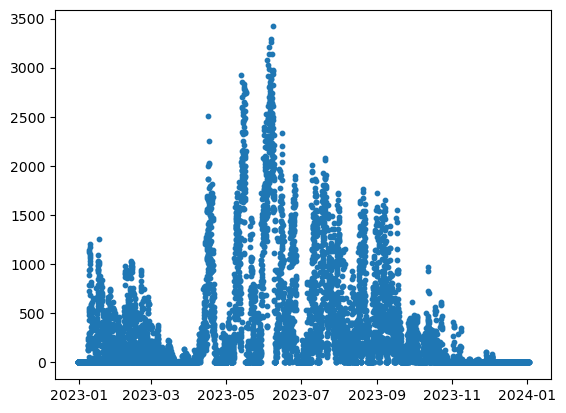

In [ ]:
plt.scatter(power_df["date_time"], power_df["Loadshed"], s=10)

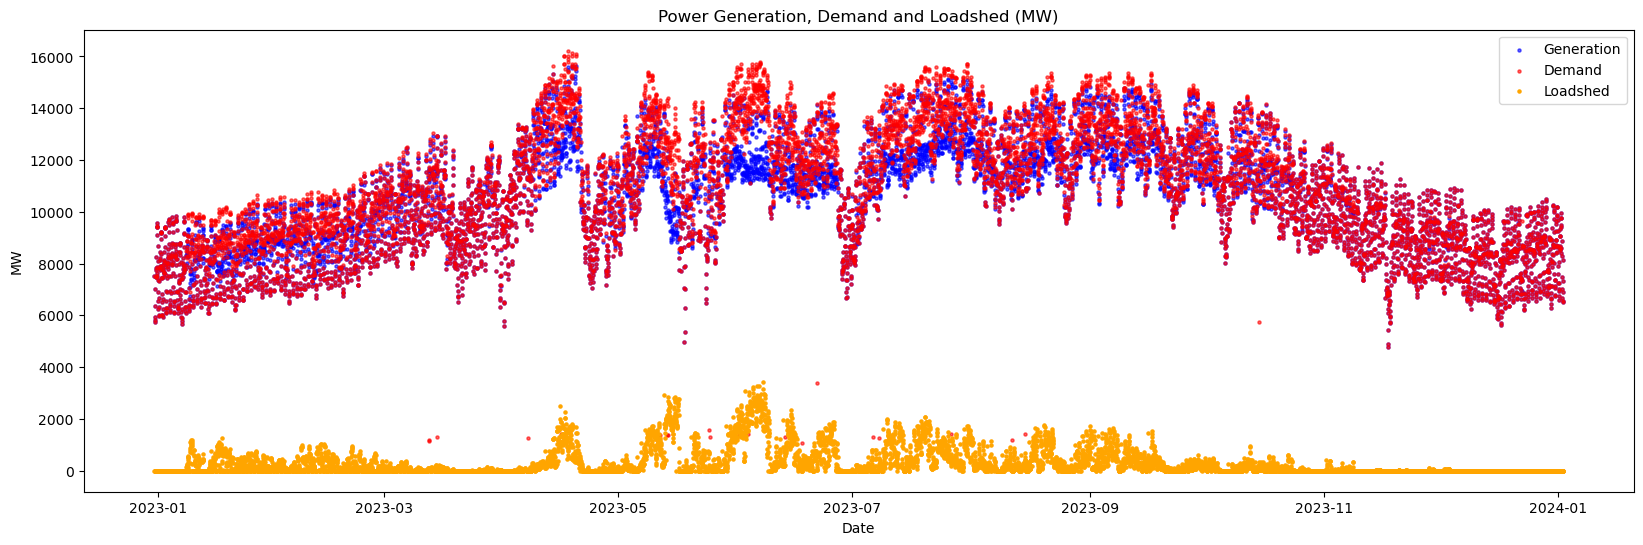

In [ ]:
plt.figure(figsize=(20, 6))
plt.scatter(
    power_df["date_time"],
    power_df["Generation"],
    s=5,
    color="blue",
    alpha=0.6,
    label="Generation",
)
plt.scatter(
    power_df["date_time"],
    power_df["Demand"],
    s=5,
    color="red",
    alpha=0.6,
    label="Demand",
)
plt.scatter(
    power_df["date_time"], power_df["Loadshed"], s=5, color="orange", label="Loadshed"
)
plt.title("Power Generation, Demand and Loadshed (MW)")
plt.xlabel("Date")
plt.ylabel("MW")
plt.legend()

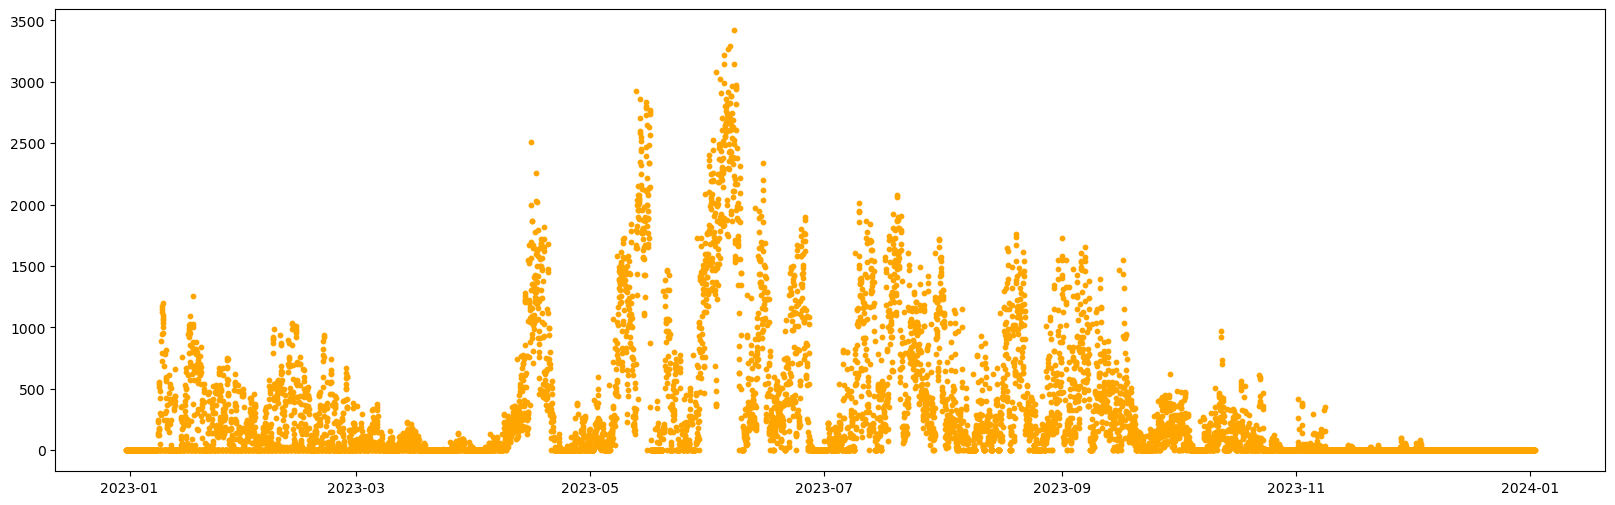

In [ ]:
plt.figure(figsize=(20, 6))
plt.scatter(power_df["date_time"], power_df["Loadshed"], s=10, color="orange")

In [ ]:
weather_df = pd.read_csv("BD_weather.csv")
weather_df

,Station,Year,Month,Day,Rainfall,Sunshine,Humidity,Temperature
0,Ambaganctg,2008,1,1,0.0,9.1,78.0,20.1
1,Ambaganctg,2008,1,2,0.0,5.6,79.0,21.0
2,Ambaganctg,2008,1,3,0.0,8.6,82.0,20.1
3,Ambaganctg,2008,1,4,0.0,9.1,73.0,21.0
4,Ambaganctg,2008,1,5,0.0,9.4,67.0,20.3
...,...,...,...,...,...,...,...,...
543834,Teknaf,2023,12,27,0.0,9.1,77.0,22.2
543835,Teknaf,2023,12,28,0.0,9.2,82.0,22.3
543836,Teknaf,2023,12,29,0.0,10.0,75.0,24.0
543837,Teknaf,2023,12,30,0.0,9.2,68.0,20.1


In [ ]:
power_df["Year"] = power_df["date_time"].dt.year
power_df["Month"] = power_df["date_time"].dt.month

# Test with 2023 Data


In [ ]:
power_df = power_df[power_df["Year"] == 2023]
weather_df = weather_df[weather_df["Year"] == 2023]

In [13]:
power_df

,Date,Time,Generation,Demand,Loadshed,Gas,Liquid Fuel,Coal,Hydro,Solar,Wind,India,India.1,India.2,Nepal,Remarks,date_time,Year,Month
34,31-12-2023,00:00:00,8039,8039,0,3857,75,3205,86,0,0.0,724,92,NaN,NaN,NaN,2023-12-31 00:00:00,2023,12
35,31-12-2023,23:00:00,8690,8690,0,3879,555,3162,86,0,0.0,912,96,NaN,NaN,NaN,2023-12-31 23:00:00,2023,12
36,31-12-2023,22:00:00,9250,9250,0,3954,845,3355,86,0,0.0,912,98,NaN,NaN,NaN,2023-12-31 22:00:00,2023,12
37,31-12-2023,21:00:00,9669,9669,0,4050,1048,3471,86,0,0.0,912,102,NaN,NaN,NaN,2023-12-31 21:00:00,2023,12
38,31-12-2023,20:00:00,9894,9894,0,4127,1197,3467,86,0,0.0,911,106,NaN,NaN,NaN,2023-12-31 20:00:00,2023,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154,01-01-2023,05:00:00,5988,5988,0,4218,206,855,46,0,NaN,600,74,NaN,NaN,NaN,2023-01-01 05:00:00,2023,1
9155,01-01-2023,04:00:00,5998,5998,0,4246,206,837,46,0,NaN,600,74,NaN,NaN,NaN,2023-01-01 04:00:00,2023,1
9156,01-01-2023,03:00:00,6258,6258,0,4372,323,859,46,0,NaN,600,70,NaN,NaN,NaN,2023-01-01 03:00:00,2023,1
9157,01-01-2023,02:00:00,6544,6544,0,4586,356,887,46,0,NaN,600,80,NaN,NaN,NaN,2023-01-01 02:00:00,2023,1


In [ ]:
weather_df["Date"] = pd.to_datetime(weather_df[["Year", "Month", "Day"]])
weather_df

/tmp/ipykernel_9604/851245356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['Date'] = pd.to_datetime(weather_df[['Year', 'Month', 'Day']])


,Station,Year,Month,Day,Rainfall,Sunshine,Humidity,Temperature,Date
5479,Ambaganctg,2023,1,1,0.0,8.3,65.0,20.4,2023-01-01
5480,Ambaganctg,2023,1,2,0.0,8.9,73.0,19.9,2023-01-02
5481,Ambaganctg,2023,1,3,0.0,7.6,80.0,19.9,2023-01-03
5482,Ambaganctg,2023,1,4,0.0,9.4,75.0,20.4,2023-01-04
5483,Ambaganctg,2023,1,5,0.0,8.0,78.0,19.6,2023-01-05
...,...,...,...,...,...,...,...,...,...
543834,Teknaf,2023,12,27,0.0,9.1,77.0,22.2,2023-12-27
543835,Teknaf,2023,12,28,0.0,9.2,82.0,22.3,2023-12-28
543836,Teknaf,2023,12,29,0.0,10.0,75.0,24.0,2023-12-29
543837,Teknaf,2023,12,30,0.0,9.2,68.0,20.1,2023-12-30


In [ ]:
daily_weather_df = (
    weather_df.groupby("Date")
    .agg(
        {
            "Rainfall": "mean",
            "Sunshine": "mean",
            "Humidity": "mean",
            "Temperature": ["mean", "max", "min"],
        }
    )
    .reset_index()
)
daily_weather_df.columns = [
    "Date",
    "Rainfall",
    "Sunshine",
    "Humidity",
    "temp_mean",
    "temp_max",
    "temp_min",
]

In [25]:
daily_weather_df

,Date,Rainfall,Sunshine,Humidity,temp_mean,temp_max,temp_min
0,2023-01-01,0.0,4.934286,80.971429,17.882857,21.6,15.5
1,2023-01-02,0.0,6.420000,78.714286,18.340000,21.6,16.3
2,2023-01-03,0.0,4.937143,81.828571,17.391429,21.0,13.6
3,2023-01-04,0.0,4.134286,84.028571,16.594286,20.8,12.2
4,2023-01-05,0.0,4.034286,85.914286,16.171429,20.9,13.3
...,...,...,...,...,...,...,...
360,2023-12-27,0.0,2.797143,82.057143,20.777143,22.4,19.1
361,2023-12-28,0.0,2.885714,81.514286,20.697143,22.5,19.4
362,2023-12-29,0.0,5.485714,78.885714,20.911429,24.0,19.5
363,2023-12-30,0.0,4.854286,78.771429,20.817143,23.1,17.8


In [ ]:
power_df["Date"] = pd.to_datetime(power_df["Date"])
daily_power_df = (
    power_df[["Generation", "Demand", "Loadshed"]]
    .groupby(power_df["Date"])
    .sum()
    .reset_index()
)

/tmp/ipykernel_9604/2507029210.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  power_df['Date'] = pd.to_datetime(power_df['Date'])
/tmp/ipykernel_9604/2507029210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_df['Date'] = pd.to_datetime(power_df['Date'])


In [ ]:
full_df = pd.merge(daily_power_df, daily_weather_df, on="Date")
full_df

,Date,Generation,Demand,Loadshed,Rainfall,Sunshine,Humidity,temp_mean,temp_max,temp_min
0,2023-01-01,192779,192779,0,0.0,4.934286,80.971429,17.882857,21.6,15.5
1,2023-01-02,193599,193599,0,0.0,6.420000,78.714286,18.340000,21.6,16.3
2,2023-01-03,197765,197765,0,0.0,4.937143,81.828571,17.391429,21.0,13.6
3,2023-01-04,199927,199927,0,0.0,4.134286,84.028571,16.594286,20.8,12.2
4,2023-01-05,201171,201171,0,0.0,4.034286,85.914286,16.171429,20.9,13.3
...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,216600,216600,0,0.0,2.797143,82.057143,20.777143,22.4,19.1
361,2023-12-28,218455,218455,0,0.0,2.885714,81.514286,20.697143,22.5,19.4
362,2023-12-29,196972,196972,0,0.0,5.485714,78.885714,20.911429,24.0,19.5
363,2023-12-30,208563,208563,0,0.0,4.854286,78.771429,20.817143,23.1,17.8


# Creating Model


In [91]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [ ]:
full_df["Loadshed"].corr(full_df["temp_min"])

0.37702181361636705

In [ ]:
full_df["Year"] = full_df["Date"].dt.year
full_df["Month"] = full_df["Date"].dt.month

In [ ]:
full_df = full_df.sort_values(by="Date")
full_df["loadshed_prev"] = full_df["Loadshed"].shift(1)

In [95]:
full_df

,Date,Generation,Demand,Loadshed,Rainfall,Sunshine,Humidity,temp_mean,temp_max,temp_min,Year,Month,loadshed_prev
0,2023-01-01,192779,192779,0,0.0,4.934286,80.971429,17.882857,21.6,15.5,2023,1,NaN
1,2023-01-02,193599,193599,0,0.0,6.420000,78.714286,18.340000,21.6,16.3,2023,1,0.0
2,2023-01-03,197765,197765,0,0.0,4.937143,81.828571,17.391429,21.0,13.6,2023,1,0.0
3,2023-01-04,199927,199927,0,0.0,4.134286,84.028571,16.594286,20.8,12.2,2023,1,0.0
4,2023-01-05,201171,201171,0,0.0,4.034286,85.914286,16.171429,20.9,13.3,2023,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,216600,216600,0,0.0,2.797143,82.057143,20.777143,22.4,19.1,2023,12,0.0
361,2023-12-28,218455,218455,0,0.0,2.885714,81.514286,20.697143,22.5,19.4,2023,12,0.0
362,2023-12-29,196972,196972,0,0.0,5.485714,78.885714,20.911429,24.0,19.5,2023,12,0.0
363,2023-12-30,208563,208563,0,0.0,4.854286,78.771429,20.817143,23.1,17.8,2023,12,0.0


In [ ]:
target_col = "Loadshed"
X = full_df.drop(columns=["Generation", "Demand", "Loadshed", "Date"])
y = full_df[target_col]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42)

train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

In [ ]:
params = {
    "objective": "regression",
    "metric": "rmse",
    "boosting_type": "gbdt",
    "num_boost_round": 1000,
    "learning_rate": 1e-2,
    "num_leaves": 63,
    # 'max_depth': 2,
    "verbose": -1,
}

model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, valid_data],
    callbacks=[lgb.early_stopping(stopping_rounds=500), lgb.log_evaluation(period=200)],
)

/home/mashrur/anaconda3/envs/my_env/lib/python3.12/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 500 rounds
[200]	training's rmse: 5549.49	valid_1's rmse: 4428.21
[400]	training's rmse: 4529.64	valid_1's rmse: 4836.64
[600]	training's rmse: 3881.59	valid_1's rmse: 5030.2
Early stopping, best iteration is:
[169]	training's rmse: 5869.8	valid_1's rmse: 4399.72


In [98]:
valid_preds = model.predict(X_valid)
np.sqrt(mean_squared_error(y_valid, valid_preds))

4399.715577440774

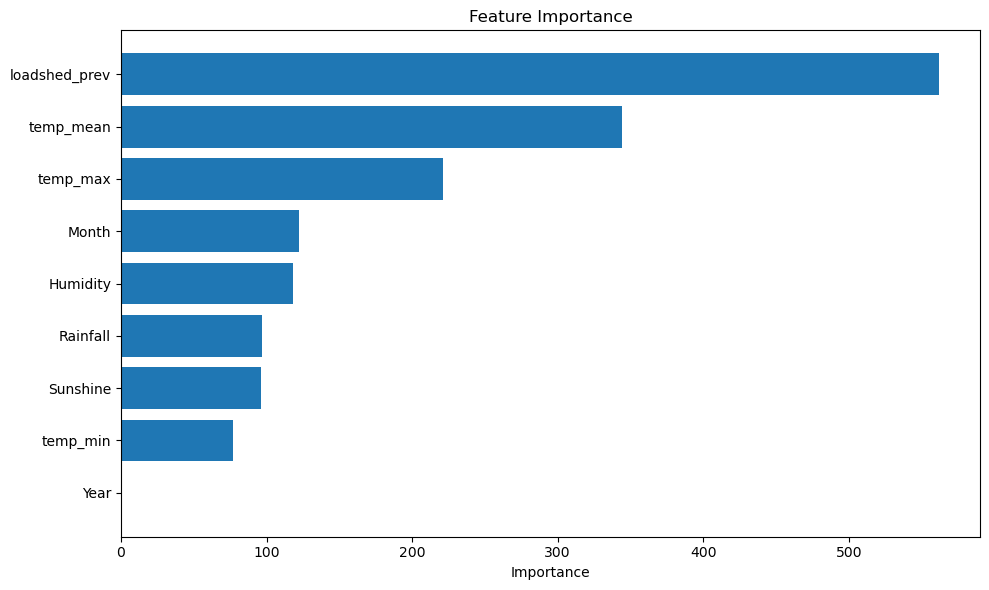

In [ ]:
importance = model.feature_importance()
features = model.feature_name()

df_importance = pd.DataFrame(
    {"Feature": features, "Importance": importance}
).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(df_importance["Feature"], df_importance["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

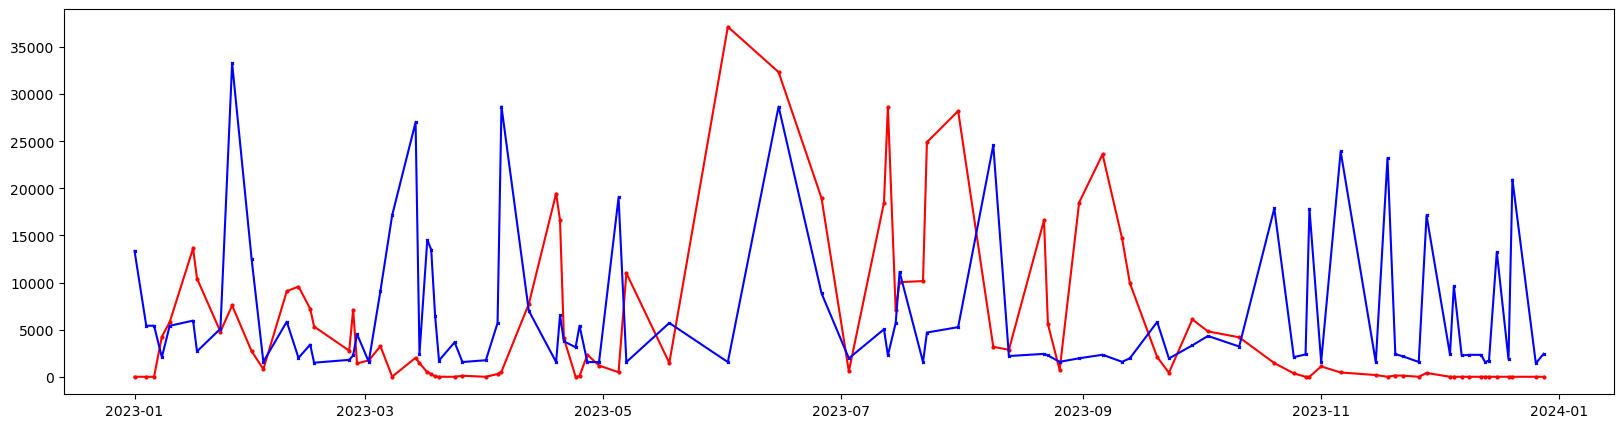

In [ ]:
valid_df = full_df.loc[X_valid.index].copy()
valid_df = valid_df.sort_values(by="Date")
valid_df["Pred"] = valid_preds
plt.figure(figsize=(20, 5))
plt.plot(valid_df["Date"], valid_df[target_col], color="red", marker="o", markersize=2)
plt.plot(valid_df["Date"], valid_df["Pred"], color="blue", marker="x", markersize=2)

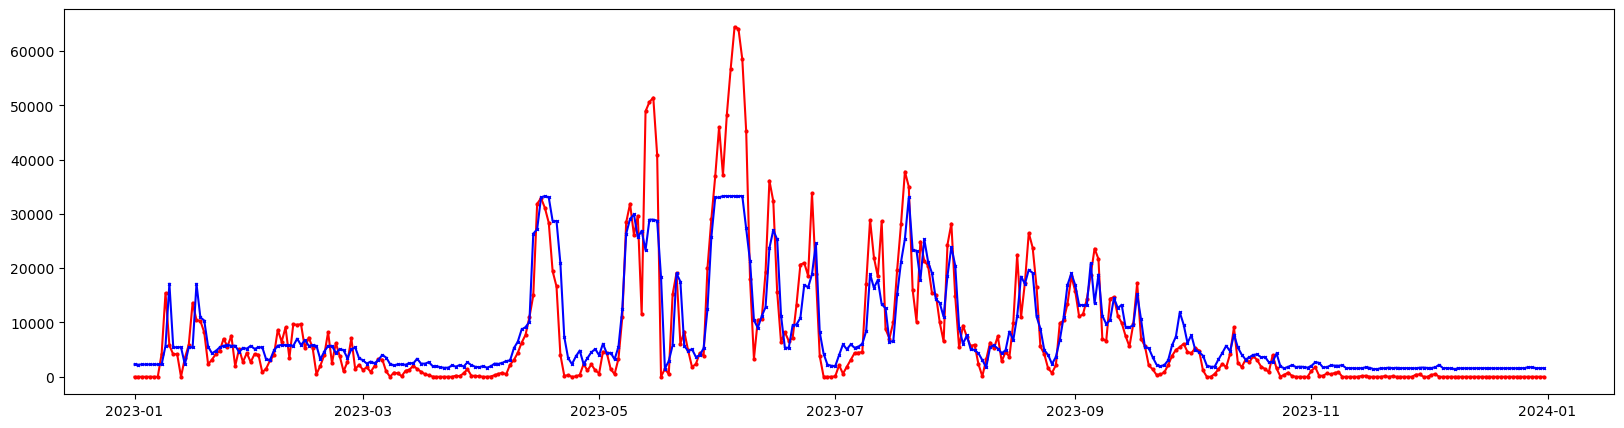

In [ ]:
view_df = full_df.copy()
view_df["Pred"] = model.predict(full_df[X_train.columns])
plt.figure(figsize=(20, 5))
plt.plot(view_df["Date"], view_df[target_col], color="red", marker="o", markersize=2)
plt.plot(view_df["Date"], view_df["Pred"], color="blue", marker="x", markersize=2)